# Goals of the Notebook:
* Data preparation and data cleaning
* EDA, feature importance analysis
* Model selection process and parameter tuning



### Imports

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data preparation and data cleaning

#### Data loading

In [4]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv('./Data/adult/adult.data', sep=',', names=column_names)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Data Cleaning

In [5]:
# the fnlwgt represents a weighting factor, and it will be discarded for simplicity
data.drop('fnlwgt', axis=1, inplace=True)

In [6]:
# the education and education-num columns are redundant so we will remove education-num
data.drop('education-num', axis=1, inplace=True)

In [7]:
# the marital-status and relationship columns are redundant so we will remove relationship
data.drop('relationship', axis=1, inplace=True)

In [8]:
# assessing missing values
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'race', 'sex', 'native-country', 'income']
numerical = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

In [9]:
# checking for null values in categorical data
for column in categorical:
	print(f'{column}: {data[column].unique()}')

workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex: [' Male' ' Female']
native-country: [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran

In [10]:
# removing the rows that have ' ?' for values
data = data[data['workclass'] != ' ?']
data = data[data['native-country'] != ' ?']
data = data[data['occupation'] != ' ?']

# checking for null values
for column in categorical:
	print(f'{column}: {data[column].unique()}')

workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex: [' Male' ' Female']
native-country: [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' 

In [11]:
# checking for null values
data[numerical].isnull().sum()

age               0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [12]:
# removing the leading and trailing whitespace from categorical variables
data[categorical] = data[categorical].apply(lambda x: x.str.strip())
data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

### EDA

In [13]:
# EDA for target variable (income)
print(data['income'].value_counts())
print(data['income'].value_counts(normalize=True))

income
<=50K    22654
>50K      7508
Name: count, dtype: int64
income
<=50K    0.751078
>50K     0.248922
Name: proportion, dtype: float64


In [14]:
# data about various numerical values
data[numerical].describe()

,age,capital-gain,capital-loss,hours-per-week
count,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1092.007858,88.372489,40.931238
std,13.134665,7406.346497,404.298370,11.979984
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


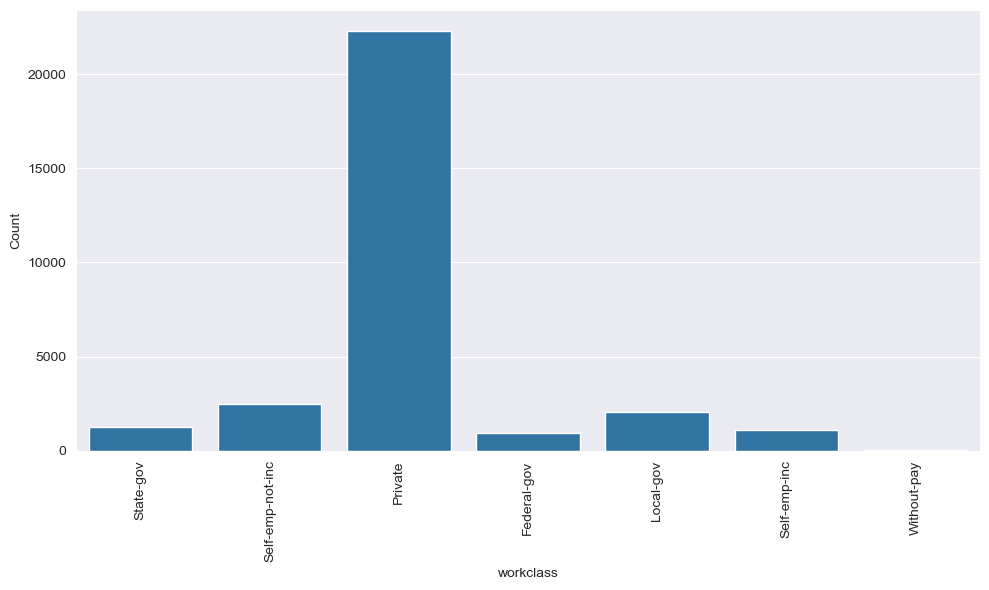

None

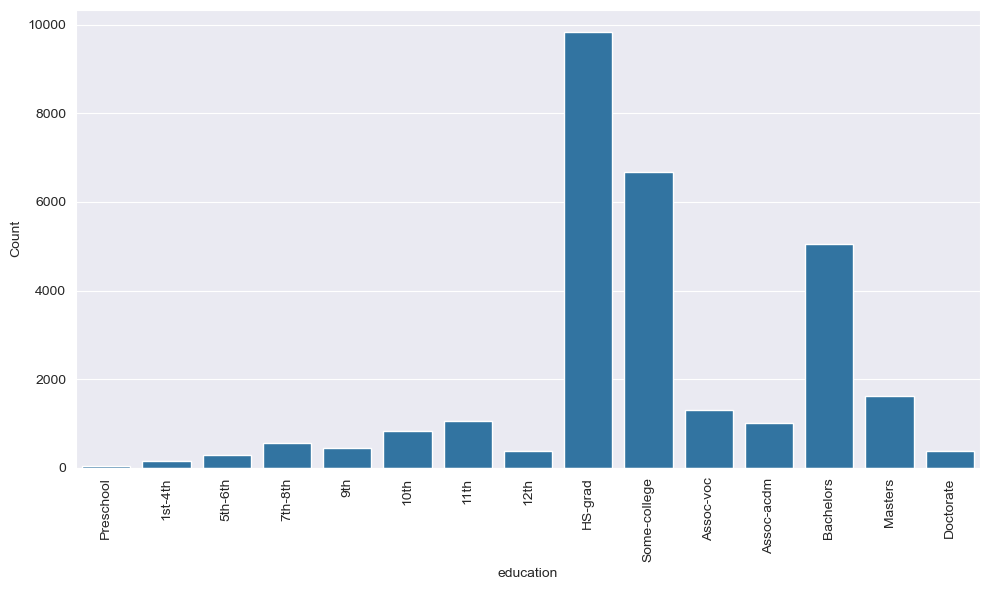

None

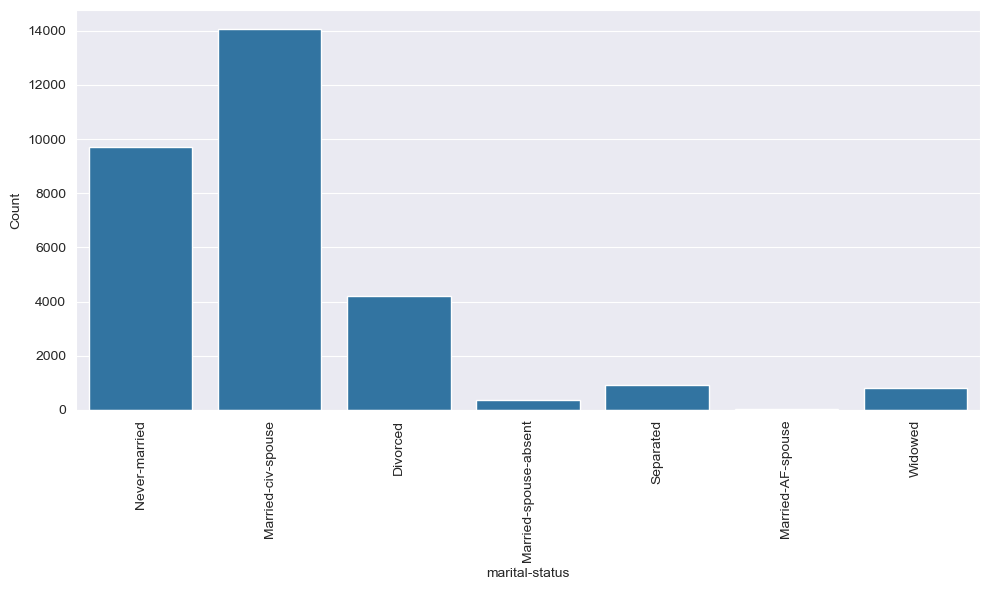

None

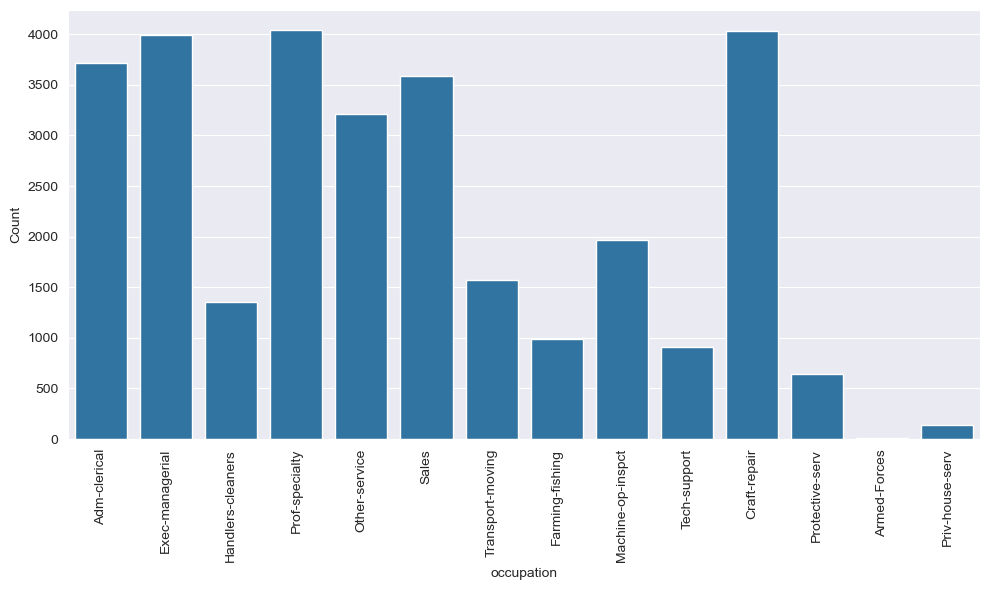

None

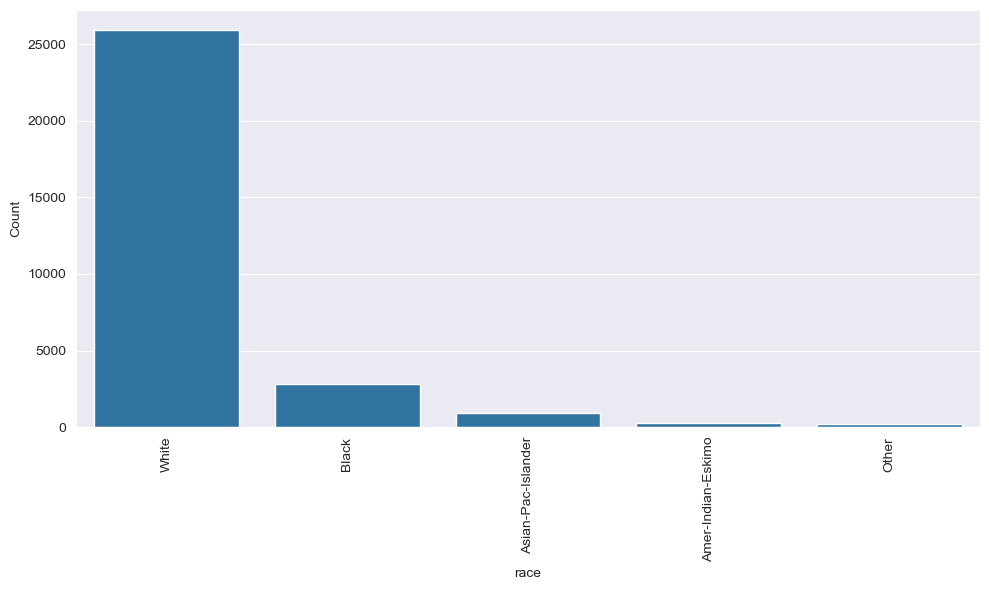

None

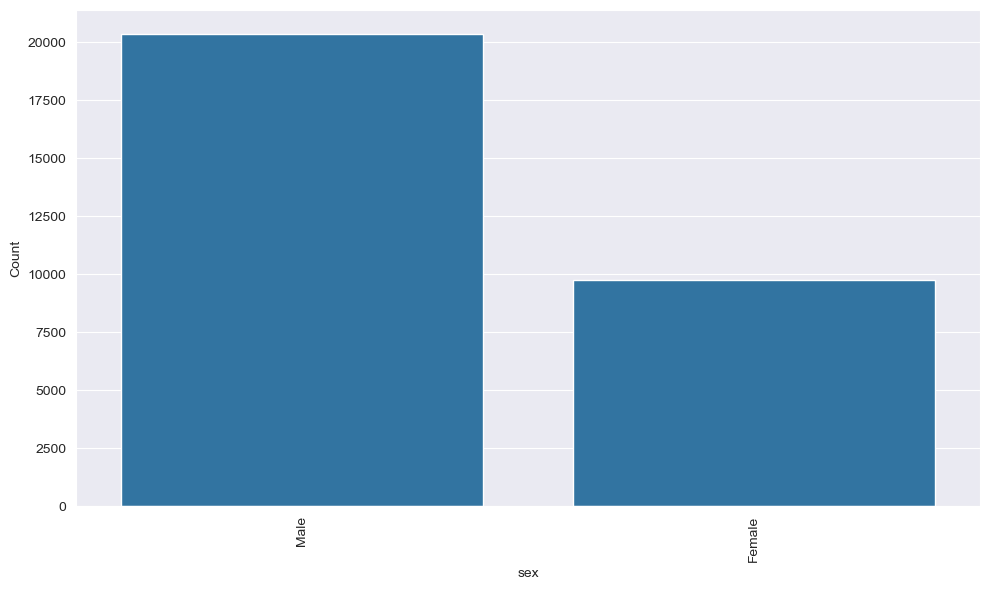

None

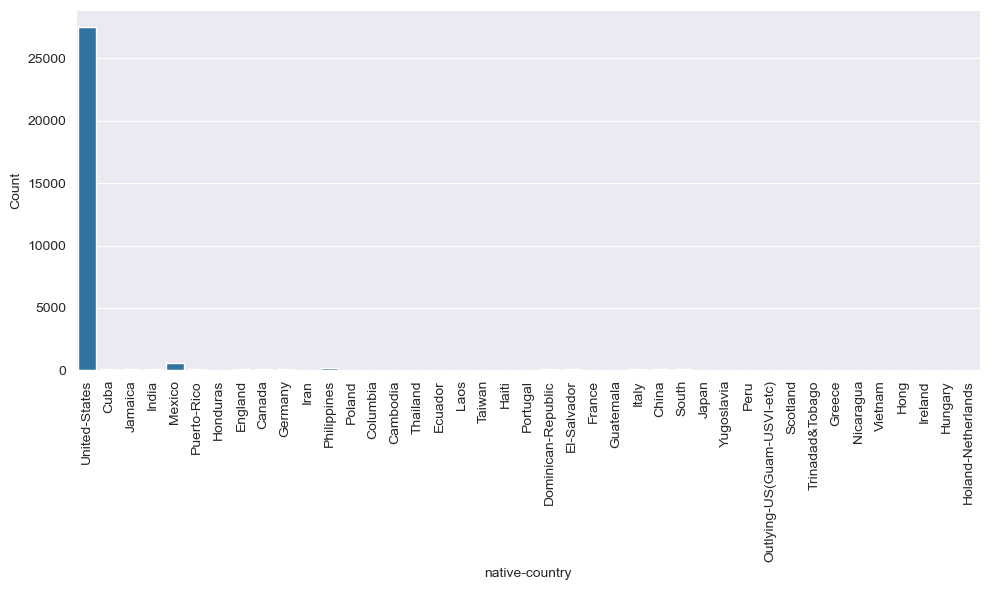

None

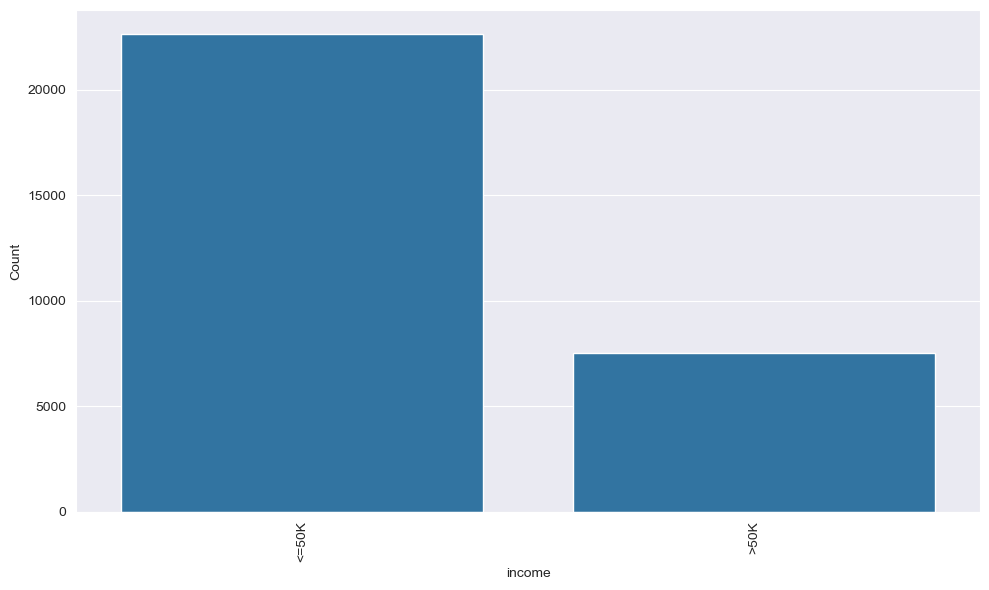

None

In [15]:
for category in categorical:
    fig, ax = plt.subplots(figsize=(10,6))

    education_order = [
        'Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th',
        'HS-grad','Some-college','Assoc-voc','Assoc-acdm','Bachelors','Masters','Doctorate'
    ]

    if category == 'education':
        sns.countplot(data=data, x=category, order=education_order, ax=ax)
    else:
        sns.countplot(data=data, x=category, ax=ax)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_xlabel(category); ax.set_ylabel("Count")
    plt.tight_layout()
    display(plt.show())

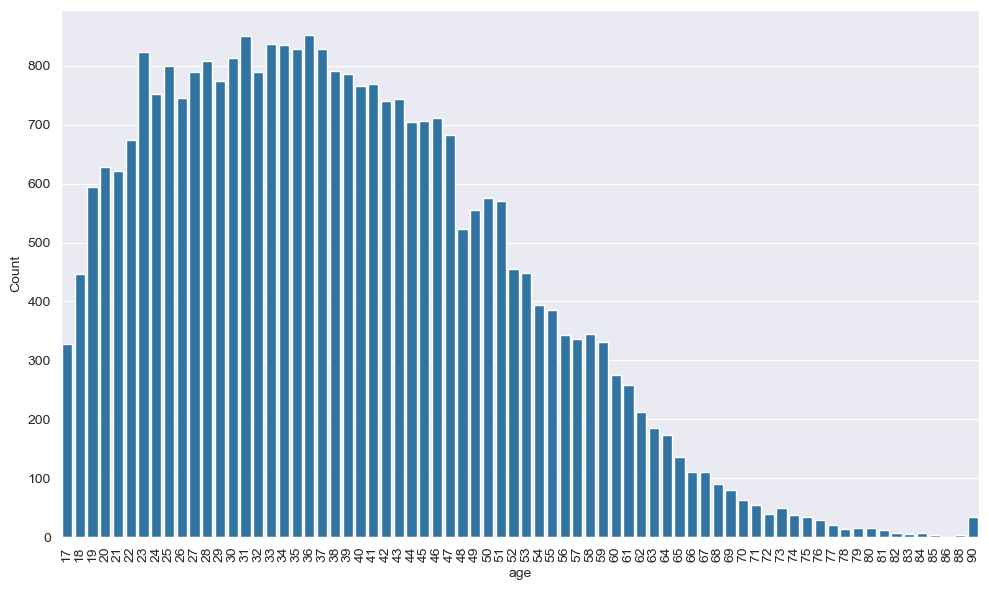

None

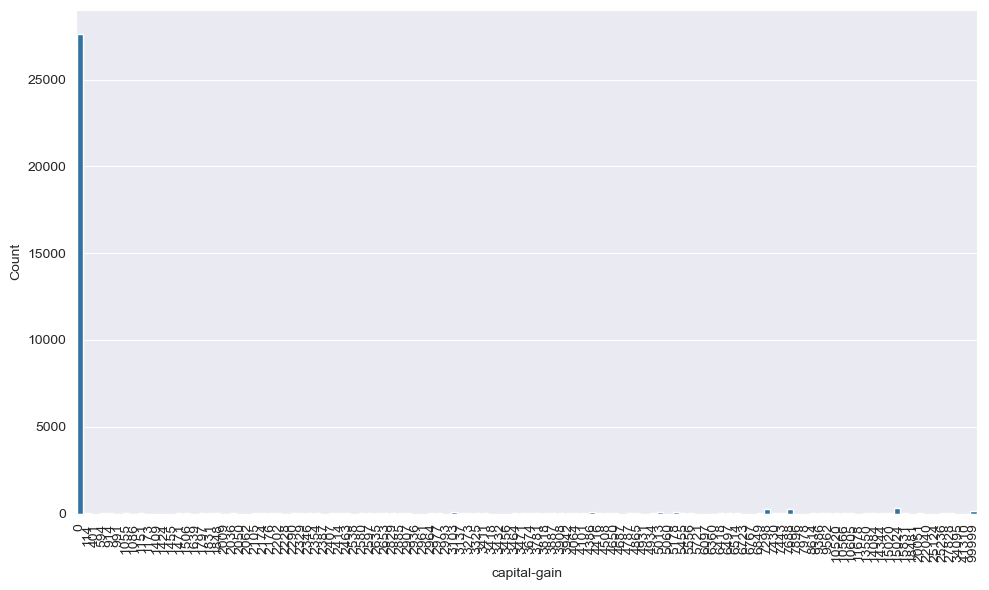

None

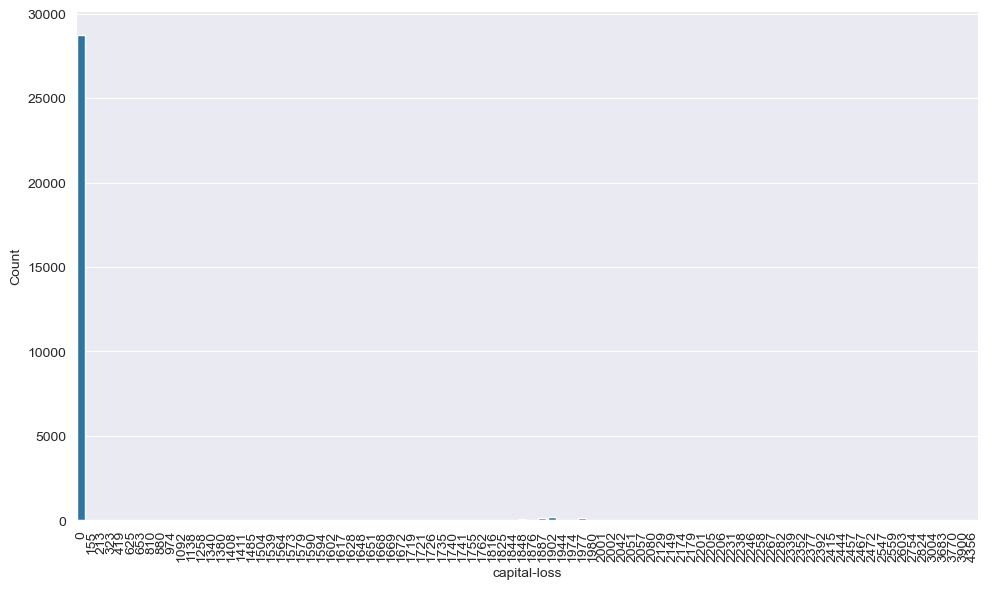

None

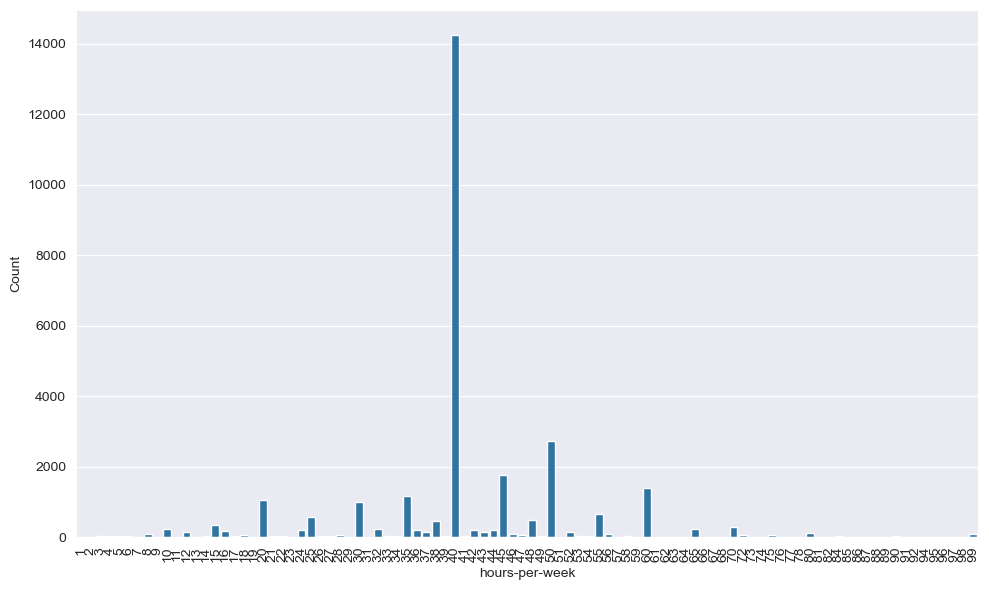

None

In [16]:
for category in numerical:
    fig, ax = plt.subplots(figsize=(10,6))

    if category == 'education':
        sns.countplot(data=data, x=category, order=education_order, ax=ax)
    else:
        sns.countplot(data=data, x=category, ax=ax)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_xlabel(category); ax.set_ylabel("Count")
    plt.tight_layout()
    display(plt.show())

# due to how Age looks, I will need to use StandardScaler on the data before doing logistic

## Data Preparation - Splitting the Dataset

In [17]:
# up until now we've had the target variable (income) in the categorical list; remove it
categorical.remove('income')

In [18]:
# changing the income value from text to numerical
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

In [19]:
# before doing mutual info score we need to split up the dataset
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.income.values
y_val = df_val.income.values
y_test = df_test.income.values

del df_train['income']
del df_val['income']
del df_test['income']

### Feature Importance Analysis - Mutual Information Score

In [20]:
# Mutual Information
mi = pd.Series(dtype=float)
for column in categorical:
	score = mutual_info_score(y_train, df_train[column])
	mi[column] = score

print(mi.sort_values(ascending=False))


marital-status    0.110704
occupation        0.062483
education         0.061144
sex               0.026474
workclass         0.012182
native-country    0.007412
race              0.005900
dtype: float64


### Feature Importance Analysis - Income Rate and Ratios

In [21]:
global_income = df_full_train.income.mean()

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).income.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_income
    df_group['risk'] = df_group['mean'] / global_income
    if c == 'education':
        display(df_group.reindex(education_order))
    else:
	    display(df_group)
    print()
    print()

workclass


,mean,count,diff,risk
workclass,,,,
Federal-gov,0.390541,740,0.142789,1.576339
Local-gov,0.295715,1657,0.047963,1.193595
Private,0.217001,17834,-0.030750,0.875882
Self-emp-inc,0.562720,853,0.314968,2.271306
Self-emp-not-inc,0.283009,2007,0.035258,1.142311
State-gov,0.274146,1025,0.026395,1.106537
Without-pay,0.000000,13,-0.247752,0.000000




education


,mean,count,diff,risk
education,,,,
Preschool,0.000000,36,-0.247752,0.000000
1st-4th,0.033613,119,-0.214138,0.135674
5th-6th,0.046083,217,-0.201669,0.186005
7th-8th,0.060000,450,-0.187752,0.242178
9th,0.059459,370,-0.188292,0.239996
10th,0.075269,651,-0.172483,0.303808
11th,0.057007,842,-0.190745,0.230098
12th,0.077441,297,-0.170311,0.312575
HS-grad,0.164601,7825,-0.083151,0.664378




marital-status


,mean,count,diff,risk
marital-status,,,,
Divorced,0.106543,3332,-0.141209,0.430038
Married-AF-spouse,0.470588,17,0.222837,1.899435
Married-civ-spouse,0.454683,11243,0.206931,1.835237
Married-spouse-absent,0.074576,295,-0.173175,0.301012
Never-married,0.046796,7864,-0.200956,0.188881
Separated,0.070539,723,-0.177212,0.284718
Widowed,0.094656,655,-0.153095,0.382062




occupation


,mean,count,diff,risk
occupation,,,,
Adm-clerical,0.133829,2959,-0.113923,0.540174
Armed-Forces,0.111111,9,-0.136641,0.448478
Craft-repair,0.228103,3231,-0.019649,0.920691
Exec-managerial,0.480038,3156,0.232286,1.937577
Farming-fishing,0.107940,806,-0.139811,0.435680
Handlers-cleaners,0.061751,1085,-0.186001,0.249246
Machine-op-inspct,0.120075,1599,-0.127677,0.484659
Other-service,0.043787,2535,-0.203965,0.176737
Priv-house-serv,0.000000,108,-0.247752,0.000000




race


,mean,count,diff,risk
race,,,,
Amer-Indian-Eskimo,0.120690,232,-0.127062,0.487140
Asian-Pac-Islander,0.278249,708,0.030497,1.123095
Black,0.129407,2241,-0.118345,0.522323
Other,0.078534,191,-0.169218,0.316987
White,0.262466,20757,0.014714,1.059390




sex


,mean,count,diff,risk
sex,,,,
Female,0.113796,7821,-0.133955,0.459316
Male,0.311994,16308,0.064242,1.259302




native-country


,mean,count,diff,risk
native-country,,,,
Cambodia,0.266667,15,0.018915,1.076347
Canada,0.340909,88,0.093157,1.376011
China,0.339286,56,0.091534,1.369459
Columbia,0.022727,44,-0.225024,0.091734
Cuba,0.275000,80,0.027248,1.109982
Dominican-Republic,0.034483,58,-0.213269,0.139183
Ecuador,0.125000,24,-0.122752,0.504537
El-Salvador,0.109756,82,-0.137996,0.443009
England,0.352113,71,0.104361,1.421232


In [22]:
## Model Training - Binary Regression

In [34]:
### Data Prep - One-Hot Encoding and Scaling
dv = DictVectorizer(sparse=False)
scaler = StandardScaler()
X_train_cat = dv.fit_transform(df_train[categorical].to_dict('records'))
X_val_cat = dv.transform(df_val.to_dict('records'))

X_train_num = scaler.fit_transform(df_train[numerical].values)
X_val_num = scaler.fit_transform(df_val[numerical].values)

X_train = np.hstack([X_train_num, X_train_cat])
X_val = np.hstack([X_val_num, X_val_cat])

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_val_pred = model.predict_proba(X_val)[:, 1]
income_decision = (y_val_pred >= 0.5)


In [36]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_val_pred
df_pred['prediction'] = income_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
print(df_pred.correct.mean())
print(df_pred)



0.8450190618266202
      probability  prediction  actual  correct
0        0.004537           0       0     True
1        0.081942           0       0     True
2        0.008155           0       0     True
3        0.208540           0       0     True
4        0.606391           1       0    False
...           ...         ...     ...      ...
6028     0.341231           0       0     True
6029     0.016194           0       0     True
6030     0.255067           0       0     True
6031     0.154532           0       0     True
6032     0.083528           0       0     True

[6033 rows x 4 columns]
